In [57]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [58]:
pd.__version__

'1.1.3'

In [59]:
# Read the CSV data into a DataFrame object
insuranceDataOrig = pd.read_csv('insurance.csv')

In [60]:
# Examine the columns (features) of the dataset
insuranceDataOrig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [61]:
# Get a glimpse of the first 5 rows of the insurance dataset
insuranceDataOrig.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [62]:
insuranceData = insuranceDataOrig[insuranceDataOrig['charges'] <50000 ]

In [63]:
# Get a glimpse of the last 5 rows of the insurance dataset
insuranceData.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [64]:
# Check how many rows are in the dataset
len(insuranceData)

1331

In [65]:
print('Total insurance data rows: ',len(insuranceData))

Total insurance data rows:  1331


In [66]:
type(insuranceData)

pandas.core.frame.DataFrame

In [67]:
# Check if there are any null values in the dataset
print(insuranceData.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [68]:
# Drop any null values
insuranceData.dropna(inplace=True)

<ipython-input-68-fbaa9daabd90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insuranceData.dropna(inplace=True)


In [69]:
print('Total insurance data rows: ',len(insuranceData))

Total insurance data rows:  1331


In [70]:
insuranceDataAge=insuranceData["age"].to_frame()

In [71]:
insuranceDataAge.columns =[ 'age']

In [72]:
insuranceDataAge

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [73]:
insuranceDataAge.sort_values(by=['age'],ascending=True)

,age
623,18
482,18
492,18
525,18
529,18
...,...
398,64
335,64
1265,64
378,64


In [74]:
print('Minimum age of insured: ',insuranceDataAge.min() )

Minimum age of insured:  age    18
dtype: int64


In [75]:
print('Maximum age of insured: ',insuranceDataAge.max() )

Maximum age of insured:  age    64
dtype: int64


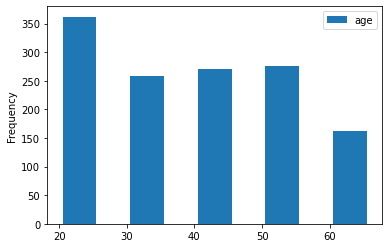

In [76]:
# Observe the distribution of ages in the dataset
custom_bins = [18, 28, 38, 48,58,68]
insuranceDataAge.plot.hist('age',  bins=custom_bins,rwidth =0.5)
plt.show()

In [77]:
insuranceDataAge=insuranceData[['age','charges']].copy()

In [78]:
insuranceDataPrice = insuranceData[['charges']].copy()

<AxesSubplot:xlabel='age', ylabel='charges'>

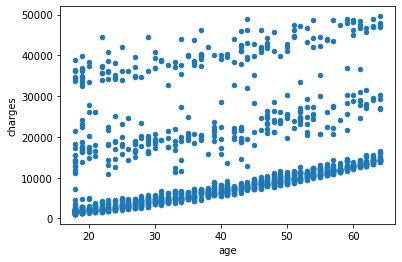

In [79]:
insuranceDataAge.plot('age', 'charges', kind='scatter')

<AxesSubplot:xlabel='sex', ylabel='charges'>

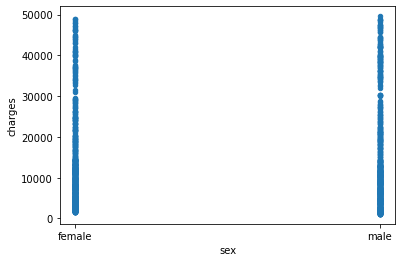

In [80]:
insuranceDataSex=insuranceData[['sex','charges']].copy()
insuranceDataSex.plot('sex', 'charges', kind='scatter')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

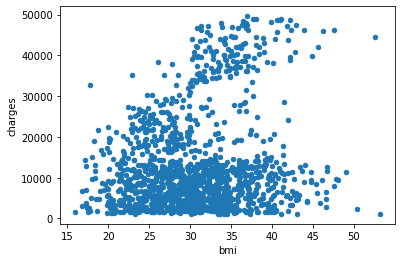

In [81]:
insuranceDataBMI=insuranceData[['bmi','charges']].copy()
insuranceDataBMI.plot('bmi', 'charges', kind='scatter')

<AxesSubplot:xlabel='children', ylabel='charges'>

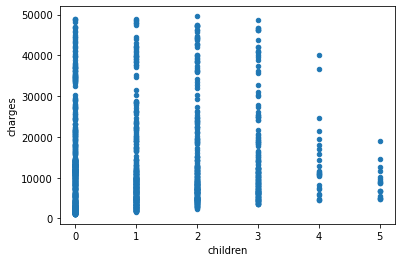

In [82]:
insuranceDataChildren=insuranceData[['children','charges']].copy()
insuranceDataChildren.plot('children', 'charges', kind='scatter')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

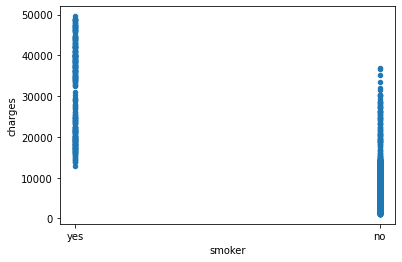

In [83]:
insuranceDataSmoker=insuranceData[['smoker','charges']].copy()
insuranceDataSmoker.plot('smoker', 'charges', kind='scatter')

<AxesSubplot:xlabel='region', ylabel='charges'>

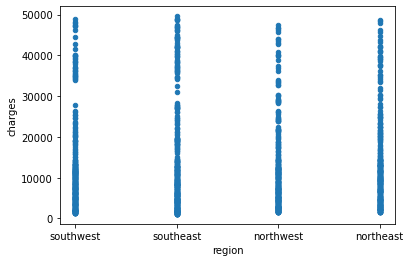

In [84]:
insuranceDataRegion=insuranceData[['region','charges']].copy()
insuranceDataRegion.plot('region', 'charges', kind='scatter')

<AxesSubplot:xlabel='region', ylabel='smoker'>

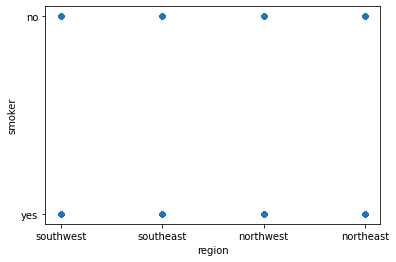

In [85]:
insuranceDataRegionSmoker=insuranceData[['smoker','region']].copy()
insuranceDataRegionSmoker.plot('region', 'smoker', kind='scatter')

In [86]:
len(insuranceDataRegionSmoker)

1331

In [87]:
train_dataset = insuranceData.sample(frac=0.85, random_state=1)
test_dataset = insuranceData.drop(train_dataset.index)

In [88]:
len(train_dataset)
train_dataset.describe()

,age,bmi,children,charges
count,1131.000000,1131.000000,1131.000000,1131.000000
mean,39.365164,30.614567,1.100796,13254.936444
std,14.011821,6.120653,1.206366,11764.007990
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4842.251225
50%,40.000000,30.305000,1.000000,9447.250350
75%,51.000000,34.735000,2.000000,16840.667970
max,64.000000,52.580000,5.000000,48970.247600


In [89]:
len(test_dataset)

200

In [90]:
!pip install pandas_profiling

In [36]:
from pandas_profiling import ProfileReport
prof = ProfileReport(insuranceData)
prof.to_file(output_file='output.html')

In [91]:
import statsmodels.api as sm
import numpy as np

In [92]:
train_dataset_Y = train_dataset['charges'].copy()
train_dataset_X = train_dataset.drop('charges',axis=1)
type(train_dataset_X)



pandas.core.frame.DataFrame

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lm = LinearRegression()

In [95]:
train_dataset_X.head()

,age,sex,bmi,children,smoker,region
1264,49,female,33.345,2,no,northeast
326,27,female,23.210,1,no,southeast
934,32,male,37.180,2,no,southeast
1024,47,female,45.320,1,no,southeast
1159,32,female,41.100,0,no,southwest


In [96]:
train_dataset_X["region"].replace({"southwest": 1.0, "southeast": 2.0,"northwest": 3.0, "northeast": 4.0}, inplace=True)

In [97]:
train_dataset_X["smoker"].replace({"no": 0.0, "yes": 1.0}, inplace=True)

In [98]:
train_dataset_X["sex"].replace({"male": 1.0, "female": 0}, inplace=True)

In [99]:
train_dataset_X.head()


,age,sex,bmi,children,smoker,region
1264,49,0.0,33.345,2,0.0,4.0
326,27,0.0,23.210,1,0.0,2.0
934,32,1.0,37.180,2,0.0,2.0
1024,47,0.0,45.320,1,0.0,2.0
1159,32,0.0,41.100,0,0.0,1.0


In [100]:
lm.fit(train_dataset_X, train_dataset_Y)

LinearRegression()

In [101]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: -12676.935983879604


In [102]:
test_dataset_Y = test_dataset['charges'].copy()
test_dataset_X = test_dataset.drop('charges',axis=1)
type(test_dataset_X)



pandas.core.frame.DataFrame

In [103]:
test_dataset_X["sex"].replace({"male": 1.0, "female": 0}, inplace=True)
test_dataset_X["region"].replace({"southwest": 1.0, "southeast": 2.0,"northwest": 3.0, "northeast": 4.0}, inplace=True)
test_dataset_X["smoker"].replace({"no": 0.0, "yes": 1.0}, inplace=True)

In [104]:
test_dataset_X.head()

,age,sex,bmi,children,smoker,region
15,19,1.0,24.600,1,0.0,1.0
20,60,0.0,36.005,0,0.0,4.0
21,30,0.0,32.400,1,0.0,1.0
24,37,1.0,28.025,2,0.0,3.0
25,59,0.0,27.720,3,0.0,2.0


In [105]:
# first five predicted prices
y_pred = lm.predict(test_dataset_X)

In [106]:
from sklearn.utils.validation import check_consistent_length, check_array

def mean_absolute_percentage_error(y_true, y_pred,
                                   sample_weight=None,
                                   multioutput='uniform_average'):
    """Mean absolute percentage error regression loss.
    Note here that we do not represent the output as a percentage in range
    [0, 100]. Instead, we represent it in range [0, 1/eps]. Read more in the
    :ref:`User Guide <mean_absolute_percentage_error>`.
    .. versionadded:: 0.24
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    multioutput : {'raw_values', 'uniform_average'} or array-like
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
        If input is list then the shape must be (n_outputs,).
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
        'uniform_average' :
            Errors of all outputs are averaged with uniform weight.
    Returns
    -------
    loss : float or ndarray of floats in the range [0, 1/eps]
        If multioutput is 'raw_values', then mean absolute percentage error
        is returned for each output separately.
        If multioutput is 'uniform_average' or an ndarray of weights, then the
        weighted average of all output errors is returned.
        MAPE output is non-negative floating point. The best value is 0.0.
        But note the fact that bad predictions can lead to arbitarily large
        MAPE values, especially if some y_true values are very close to zero.
        Note that we return a large value instead of `inf` when y_true is zero.
    Examples
    --------
    >>> from sklearn.metrics import mean_absolute_percentage_error
    >>> y_true = [3, -0.5, 2, 7]
    >>> y_pred = [2.5, 0.0, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    0.3273...
    >>> y_true = [[0.5, 1], [-1, 1], [7, -6]]
    >>> y_pred = [[0, 2], [-1, 2], [8, -5]]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    0.5515...
    >>> mean_absolute_percentage_error(y_true, y_pred, multioutput=[0.3, 0.7])
    0.6198...
    """
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
        y_true, y_pred, multioutput)
    check_consistent_length(y_true, y_pred, sample_weight)
    epsilon = np.finfo(np.float64).eps
    mape = np.abs(y_pred - y_true) / np.maximum(np.abs(y_true), epsilon)
    output_errors = np.average(mape,
                               weights=sample_weight, axis=0)
    if isinstance(multioutput, str):
        if multioutput == 'raw_values':
            return output_errors
        elif multioutput == 'uniform_average':
            # pass None as weights to np.average: uniform mean
            multioutput = None

    return np.average(output_errors, weights=multioutput)

def _check_reg_targets(y_true, y_pred, multioutput, dtype="numeric"):
    """Check that y_true and y_pred belong to the same regression task.
    Parameters
    ----------
    y_true : array-like
    y_pred : array-like
    multioutput : array-like or string in ['raw_values', uniform_average',
        'variance_weighted'] or None
        None is accepted due to backward compatibility of r2_score().
    Returns
    -------
    type_true : one of {'continuous', continuous-multioutput'}
        The type of the true target data, as output by
        'utils.multiclass.type_of_target'.
    y_true : array-like of shape (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples, n_outputs)
        Estimated target values.
    multioutput : array-like of shape (n_outputs) or string in ['raw_values',
        uniform_average', 'variance_weighted'] or None
        Custom output weights if ``multioutput`` is array-like or
        just the corresponding argument if ``multioutput`` is a
        correct keyword.
    dtype : str or list, default="numeric"
        the dtype argument passed to check_array.
    """
    check_consistent_length(y_true, y_pred)
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)

    if y_true.ndim == 1:
        y_true = y_true.reshape((-1, 1))

    if y_pred.ndim == 1:
        y_pred = y_pred.reshape((-1, 1))

    if y_true.shape[1] != y_pred.shape[1]:
        raise ValueError("y_true and y_pred have different number of output "
                         "({0}!={1})".format(y_true.shape[1], y_pred.shape[1]))

    n_outputs = y_true.shape[1]
    allowed_multioutput_str = ('raw_values', 'uniform_average',
                               'variance_weighted')
    if isinstance(multioutput, str):
        if multioutput not in allowed_multioutput_str:
            raise ValueError("Allowed 'multioutput' string values are {}. "
                             "You provided multioutput={!r}".format(
                                 allowed_multioutput_str,
                                 multioutput))
    elif multioutput is not None:
        multioutput = check_array(multioutput, ensure_2d=False)
        if n_outputs == 1:
            raise ValueError("Custom weights are useful only in "
                             "multi-output cases.")
        elif n_outputs != len(multioutput):
            raise ValueError(("There must be equally many custom weights "
                              "(%d) as outputs (%d).") %
                             (len(multioutput), n_outputs))
    y_type = 'continuous' if n_outputs == 1 else 'continuous-multioutput'

    return y_type, y_true, y_pred, multioutput

In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

linearMAE = mean_absolute_error(test_dataset_Y, y_pred)
linearRMS = sqrt(mean_squared_error(test_dataset_Y, y_pred))
linearMAPE = mean_absolute_percentage_error(test_dataset_Y, y_pred)

In [135]:
from sklearn.metrics import mean_absolute_error

In [136]:
mean_absolute_error(test_dataset_Y, y_pred)

3629.109510852434

In [137]:
from sklearn import linear_model

In [138]:
regRidge = linear_model.Ridge(alpha=.5)

In [139]:
regRidge.fit(train_dataset_X, train_dataset_Y)

Ridge(alpha=0.5)

In [140]:
regRidge.coef_

array([  253.86966727,  -232.27263011,   318.13575429,   492.14381148,
       23018.38883335,   400.48189288])

In [141]:
regRidge.intercept_

-12662.874170033472

In [142]:
y_pred_ridge = regRidge.predict(test_dataset_X)

In [143]:
ridgeMAE = mean_absolute_error(test_dataset_Y, y_pred_ridge)
ridgeRMS = sqrt(mean_squared_error(test_dataset_Y, y_pred_ridge))
ridgeMAPE = mean_absolute_percentage_error(test_dataset_Y, y_pred_ridge)

In [144]:
regLasso = linear_model.Lasso(alpha=0.1)

In [145]:
regLasso.fit(train_dataset_X, train_dataset_Y)

Lasso(alpha=0.1)

In [146]:
regLasso.coef_

array([  253.92961456,  -236.1887497 ,   318.17030238,   491.84660883,
       23080.27531448,   400.36863707])

In [147]:
regLasso.intercept_

-12676.512890644426

In [148]:
y_pred_Lasso = regLasso.predict(test_dataset_X)

In [149]:
lassoMAE = mean_absolute_error(test_dataset_Y, y_pred_Lasso)
lassoRMS = sqrt(mean_squared_error(test_dataset_Y, y_pred_Lasso))
lassoMAPE = mean_absolute_percentage_error(test_dataset_Y, y_pred_Lasso)

In [150]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [151]:
regSGD = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

In [152]:
regSGD.fit(train_dataset_X, train_dataset_Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [153]:
y_pred_SGD = regSGD.predict(test_dataset_X)

In [154]:
SGDMAE = mean_absolute_error(test_dataset_Y, y_pred_SGD)
SGDRMS = sqrt(mean_squared_error(test_dataset_Y, y_pred_SGD))
SGDMAPE = mean_absolute_percentage_error(test_dataset_Y, y_pred_SGD)

In [128]:
test_dataset_Y.head(10)

15     1837.23700
20    13228.84695
21     4149.73600
24     6203.90175
25    14001.13380
45    20630.28351
56    13607.36875
64    14711.74380
78     2755.02095
80     4441.21315
Name: charges, dtype: float64

In [129]:
y_pred_SGD[:5]

array([  621.49847181, 15586.3769094 ,  6108.21390369,  7560.55213969,
       13327.00378776])

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [132]:
regressor.fit(train_dataset_X, train_dataset_Y)

RandomForestRegressor(random_state=0)

In [133]:
Y_pred_rf = regressor.predict(test_dataset_X)

In [185]:
rfMAE = mean_absolute_error(test_dataset_Y, Y_pred_rf)
rfRMS = sqrt(mean_squared_error(test_dataset_Y, Y_pred_rf))
rfMAPE = mean_absolute_percentage_error(test_dataset_Y, Y_pred_rf)

In [186]:
Y_pred_rf[:10]

array([ 1876.5317445, 13507.9744913,  5191.5799521,  6567.2028355,
       14473.4370436, 12054.4241057, 14327.7085952, 17523.1671569,
        2757.159161 ,  4939.4560234])

In [187]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV



In [188]:
regRidge.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [189]:
#param_grid = [{'C': [0.001, 0.1, 1, 10, 100]}]
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}


grid = GridSearchCV(regRidge, param_grid = parameters,cv=6)

grid.fit(train_dataset_X, train_dataset_Y)
print(grid.best_params_)
grid_predictions = grid.predict(test_dataset_X) 




{'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [190]:
len(grid_predictions)

200

In [191]:
ridgeMAE = mean_absolute_error(test_dataset_Y, grid_predictions)
ridgeRMS = sqrt(mean_squared_error(test_dataset_Y, grid_predictions))
ridgeMAPE = mean_absolute_percentage_error(test_dataset_Y, grid_predictions)

In [192]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_dataset_Y, grid_predictions)

28192414.781773586

In [193]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [194]:
from xgboost import XGBRegressor

In [195]:
XGBmodel = XGBRegressor()

In [196]:
cv = RepeatedKFold(n_splits=25, n_repeats=5, random_state=1)

In [197]:
cvscr = cross_val_score(XGBmodel, train_dataset_X, train_dataset_Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [198]:
from numpy import absolute

In [199]:
XGBscores = absolute(cvscr)

In [200]:
print('Mean MAE: %.3f (%.3f)' % (XGBscores.mean(), XGBscores.std()) )

Mean MAE: 2981.053 (658.391)


In [201]:
XGBmodel.fit(train_dataset_X, train_dataset_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [202]:
y_pred_XGB = XGBmodel.predict(test_dataset_X)

In [203]:
XGBMae = mean_absolute_error(test_dataset_Y, y_pred_XGB)
XGBRMS = sqrt(mean_squared_error(test_dataset_Y, y_pred_XGB))
XGBMAPE = mean_absolute_percentage_error(test_dataset_Y, y_pred_XGB)

In [204]:
import lightgbm as lgb

In [205]:
lgbmModel = lgb.LGBMRegressor()

In [206]:
cv = RepeatedKFold(n_splits=25, n_repeats=5, random_state=1)

In [207]:
cvscr = cross_val_score(lgbmModel, train_dataset_X, train_dataset_Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [208]:
lgbmModel.fit(train_dataset_X, train_dataset_Y)

LGBMRegressor()

In [209]:
y_pred_LGBM = lgbmModel.predict(test_dataset_X)

In [210]:
LGBMMAE = mean_absolute_error(test_dataset_Y, y_pred_LGBM)
LGBMRMS = sqrt(mean_squared_error(test_dataset_Y, y_pred_LGBM))
LGBMMAPE = mean_absolute_percentage_error(test_dataset_Y, y_pred_LGBM)

In [211]:
!pip install tabulate

In [212]:
from tabulate import tabulate

In [215]:
table = [["Linear ",linearMAE,linearRMS,linearMAPE,2134,5678],["Ridge",ridgeMAE,ridgeRMS,ridgeMAPE,7654,5677],["Lasso",lassoMAE,lassoRMS,lassoMAPE,7654,5677],["St Grd Dsc",SGDMAE,SGDRMS,SGDMAPE,7654,5677], ["Random Forest",rfMAE,rfRMS,rfMAPE,7654,5677],["XGB",XGBMae,XGBRMS,XGBMAPE,7654,5677], ["LGBM",LGBMMAE,LGBMRMS,LGBMMAPE,7654,5677]]

print(tabulate(table, headers=["Algorithm ","MAE", "RMSE","MAPE","Mean (Charges)", "Median (Charges)"],tablefmt="psql"))

+---------------+---------+---------+----------+------------------+--------------------+
| Algorithm     |     MAE |    RMSE |     MAPE |   Mean (Charges) |   Median (Charges) |
|---------------+---------+---------+----------+------------------+--------------------|
| Linear        | 3629.11 | 5307.92 | 0.450496 |             2134 |               5678 |
| Ridge         | 3634.17 | 5309.65 | 0.451491 |             7654 |               5677 |
| Lasso         | 3629.16 | 5307.92 | 0.450507 |             7654 |               5677 |
| St Grd Dsc    | 3633.46 | 5308.18 | 0.454109 |             7654 |               5677 |
| Random Forest | 2421.24 | 4384.61 | 0.377155 |             7654 |               5677 |
| XGB           | 2857.21 | 4904.07 | 0.493358 |             7654 |               5677 |
| LGBM          | 2411.88 | 4234.61 | 0.377277 |             7654 |               5677 |
+---------------+---------+---------+----------+------------------+--------------------+
